In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys

In [67]:
network = 'tarbase'

In [68]:
pic_path = '../local/pictures/'

In [69]:
ensembl_paralogmirna_path = './sd.ensembl_paralogmirna.tsv'
mirgenedb_paralogmirna_path = './sd.mgdb_paralogmirna.tsv'
mirgenedb_ohnomirna_path = './sd.mgdb_ohnomirna.tsv'

df_ensembl_p = pd.read_csv(ensembl_paralogmirna_path, sep='\t')
df_mirgenedb_p = pd.read_csv(mirgenedb_paralogmirna_path, sep='\t')
df_mirgenedb_o = pd.read_csv(mirgenedb_ohnomirna_path, sep='\t')

print("Original data sizes:", file=sys.stderr)
print(f"Ensembl Paralog miRNA: {df_ensembl_p.shape[0]}", file=sys.stderr)
print(f"miRGeneDB Paralog miRNA: {df_mirgenedb_p.shape[0]}", file=sys.stderr)
print(f"miRGeneDB Ohno miRNA: {df_mirgenedb_o.shape[0]}", file=sys.stderr)

# remove rows where the third column is not a number
df_ensembl_p = df_ensembl_p[pd.to_numeric(df_ensembl_p.iloc[:, 2], errors='coerce').notnull()]
df_mirgenedb_p = df_mirgenedb_p[pd.to_numeric(df_mirgenedb_p.iloc[:, 2], errors='coerce').notnull()]
df_mirgenedb_o = df_mirgenedb_o[pd.to_numeric(df_mirgenedb_o.iloc[:, 2], errors='coerce').notnull()]

print(150*"-", file=sys.stderr)
print(f"Data sizes after removing non-numeric values (not in {network}):", file=sys.stderr)
print(f"Ensembl Paralog miRNA: {df_ensembl_p.shape[0]}", file=sys.stderr)
print(f"miRGeneDB Paralog miRNA: {df_mirgenedb_p.shape[0]}", file=sys.stderr)
print(f"miRGeneDB Ohno miRNA: {df_mirgenedb_o.shape[0]}", file=sys.stderr)

col_names = ['miRNA_1_name', 'miRNA_2_name', f'{network}_sd_similarity', 'Error_cause']
df_ensembl_p.columns = col_names
df_mirgenedb_p.columns = col_names
df_mirgenedb_o.columns = col_names

# drop the 'Error_cause' column
df_ensembl_p = df_ensembl_p.drop(columns=['Error_cause'])
df_mirgenedb_p = df_mirgenedb_p.drop(columns=['Error_cause'])
df_mirgenedb_o = df_mirgenedb_o.drop(columns=['Error_cause'])

Original data sizes:
Ensembl Paralog miRNA: 2149
miRGeneDB Paralog miRNA: 2654
miRGeneDB Ohno miRNA: 127
------------------------------------------------------------------------------------------------------------------------------------------------------
Data sizes after removing non-numeric values (not in tarbase):
Ensembl Paralog miRNA: 756
miRGeneDB Paralog miRNA: 1405
miRGeneDB Ohno miRNA: 126


In [70]:
putative_intragenic_ohnomirna_path = '../../OhnomiRNAs/dataset/6_ReciprocalBestHits/ohnomirna_paralogmirna.ssdmirna_wgdmirna_ensembl_check.7mer_s5_align_scores.tarbase_flag.strand_check.tarbase_sd.mirdip_top_sd.mirdip_complete_sd.rbh_wgd.tsv'
putative_intragenic_paralogmirna_path = '../../OhnomiRNAs/dataset/6_ReciprocalBestHits/ohnomirna_paralogmirna.ssdmirna_wgdmirna_ensembl_check.7mer_s5_align_scores.tarbase_flag.strand_check.tarbase_sd.mirdip_top_sd.mirdip_complete_sd.rbh_ssd.tsv'

df_putative_intragenic_p = pd.read_csv(putative_intragenic_paralogmirna_path, sep='\t')
df_putative_intragenic_o = pd.read_csv(putative_intragenic_ohnomirna_path, sep='\t')

print("Original size of putative intragenic datasets:", file=sys.stderr)
print(f"Putative Intragenic Paralog miRNA: {df_putative_intragenic_p.shape[0]}", file=sys.stderr)
print(f"Putative Intragenic OhnomiRNA: {df_putative_intragenic_o.shape[0]}", file=sys.stderr)

# remover rows where in one of the two columns "miRNA_1_mirgenedb_flag" or "miRNA_2_mirgenedb_flag" is "mirgenedb_not_confirmed"
df_putative_intragenic_p_preEnsFilter = df_putative_intragenic_p[
	(df_putative_intragenic_p['miRNA_1_mirgenedb_flag'] != 'mirgenedb_not_confirmed') &
	(df_putative_intragenic_p['miRNA_2_mirgenedb_flag'] != 'mirgenedb_not_confirmed')
]
df_putative_intragenic_o_preEnsFilter = df_putative_intragenic_o[
	(df_putative_intragenic_o['miRNA_1_mirgenedb_flag'] != 'mirgenedb_not_confirmed') &
	(df_putative_intragenic_o['miRNA_2_mirgenedb_flag'] != 'mirgenedb_not_confirmed')
]

# remove those pairs where the "miRNA_pair_LCA" is "Ensembl_not_verified"
df_putative_intragenic_p = df_putative_intragenic_p[df_putative_intragenic_p['miRNA_pair_LCA'] != 'Ensembl_not_verified']
df_putative_intragenic_o = df_putative_intragenic_o[df_putative_intragenic_o['miRNA_pair_LCA'] != 'Ensembl_not_verified']

print(150*"-", file=sys.stderr)
print("Size of putative intragenic datasets after removing 'mirgenedb_not_confirmed':", file=sys.stderr)
print(f"Putative Intragenic Paralog miRNA: {df_putative_intragenic_p_preEnsFilter.shape[0]}", file=sys.stderr)
print(f"Putative Intragenic OhnomiRNA: {df_putative_intragenic_o_preEnsFilter.shape[0]}", file=sys.stderr)

cols_to_keep = ['miRNA_1_name', 'miRNA_2_name', f'{network}_sd_similarity']
df_putative_intragenic_p = df_putative_intragenic_p[cols_to_keep]
df_putative_intragenic_o = df_putative_intragenic_o[cols_to_keep]
df_putative_intragenic_o_preEnsFilter = df_putative_intragenic_o_preEnsFilter[cols_to_keep]
df_putative_intragenic_p_preEnsFilter = df_putative_intragenic_p_preEnsFilter[cols_to_keep]

df_putative_intragenic_p = df_putative_intragenic_p.dropna(subset=[f'{network}_sd_similarity'])
df_putative_intragenic_o = df_putative_intragenic_o.dropna(subset=[f'{network}_sd_similarity'])
df_putative_intragenic_o_preEnsFilter = df_putative_intragenic_o_preEnsFilter.dropna(subset=[f'{network}_sd_similarity'])
df_putative_intragenic_p_preEnsFilter = df_putative_intragenic_p_preEnsFilter.dropna(subset=[f'{network}_sd_similarity'])

print(150*"-", file=sys.stderr)
print("Size of putative intragenic datasets after dropping NaN values:", file=sys.stderr)
print(f"Putative Intragenic Paralog miRNA: {df_putative_intragenic_p.shape[0]}", file=sys.stderr)
print(f"Putative Intragenic OhnomiRNA: {df_putative_intragenic_o.shape[0]}", file=sys.stderr)
print(f"Putative Intragenic Paralog miRNA (pre-Ensembl filter): {df_putative_intragenic_p_preEnsFilter.shape[0]}", file=sys.stderr)
print(f"Putative Intragenic OhnomiRNA (pre-Ensembl filter): {df_putative_intragenic_o_preEnsFilter.shape[0]}", file=sys.stderr)

Original size of putative intragenic datasets:
Putative Intragenic Paralog miRNA: 301
Putative Intragenic OhnomiRNA: 64
------------------------------------------------------------------------------------------------------------------------------------------------------
Size of putative intragenic datasets after removing 'mirgenedb_not_confirmed':
Putative Intragenic Paralog miRNA: 36
Putative Intragenic OhnomiRNA: 20
------------------------------------------------------------------------------------------------------------------------------------------------------
Size of putative intragenic datasets after dropping NaN values:
Putative Intragenic Paralog miRNA: 1
Putative Intragenic OhnomiRNA: 17
Putative Intragenic Paralog miRNA (pre-Ensembl filter): 25
Putative Intragenic OhnomiRNA (pre-Ensembl filter): 18


In [71]:
df_putative_intragenic_o_preEnsFilter

,miRNA_1_name,miRNA_2_name,tarbase_sd_similarity
0,MIR152,MIR148B,0.707965
7,MIR128-1,MIR128-2,1.000000
10,MIR153-1,MIR153-2,1.000000
15,MIR33B,MIR33A,0.333333
21,MIR199A1,MIR199B,0.956098
23,MIR199A1,MIR199A2,1.000000
25,MIR204,MIR211,0.401361
31,MIR199B,MIR199A2,0.956098
38,MIR10A,MIR10B,0.237288
39,MIR103A1,MIR103A2,0.938272


In [72]:
def remove_duplicates(df):
	"Remove duplicate rows based on 'miRNA_1_name' and 'miRNA_2_name' regardless of order."
	df['pair'] = df.apply(lambda x: tuple(sorted([x['miRNA_1_name'], x['miRNA_2_name']])), axis=1)
	unique_df = df.drop_duplicates(subset='pair').drop(columns='pair')
	return unique_df

def remove_mirna_pairs(df1, df2):
	"""
	Removes from df1 all rows whose (miRNA_1, miRNA_2) pairs (regardless of order)
	are present in df2.
	"""
	# Create a set of tuples for the miRNA pairs in df2
	mirna_pairs = set()
	for _, row in df2.iterrows():
		mirna1 = row['miRNA_1_name']
		mirna2 = row['miRNA_2_name']
		if mirna1 != mirna2:
			mirna_pairs.add(tuple(sorted([mirna1, mirna2])))

	# Filter df1 to remove rows with miRNA pairs present in df2
	filtered_df = df1[~df1.apply(lambda row: tuple(sorted([row['miRNA_1'], row['miRNA_2']])) in mirna_pairs, axis=1)]
	
	return filtered_df

In [73]:
df_mirgenedb_o = pd.concat([df_mirgenedb_o, df_putative_intragenic_o[~df_putative_intragenic_o.set_index(['miRNA_1_name', 'miRNA_2_name']).index.isin(df_mirgenedb_o.set_index(['miRNA_1_name', 'miRNA_2_name']).index)]])
df_mirgenedb_o = remove_duplicates(df_mirgenedb_o)
print("Size of miRGeneDB OhnomiRNA after adding putative intragenic OhnomiRNA:", file=sys.stderr)
print(f"miRGeneDB OhnomiRNA: {df_mirgenedb_o.shape[0]}", file=sys.stderr)

Size of miRGeneDB OhnomiRNA after adding putative intragenic OhnomiRNA:
miRGeneDB OhnomiRNA: 113


In [74]:
df_mirgenedb_o.to_csv("test.tsv", sep='\t', index=False)

In [75]:
unordered_pairs_o = set(tuple(sorted(map(str, row))) for row in df_mirgenedb_o.iloc[:, :2].values)
unordered_intragenic_pairs_o = set(tuple(sorted(map(str, row))) for row in df_putative_intragenic_o.iloc[:, :2].values)
unordered_pairs_o.update(unordered_intragenic_pairs_o)

df_mirgenedb_p = df_mirgenedb_p[~df_mirgenedb_p.iloc[:, :2].apply(lambda x: tuple(sorted(map(str, x))) in unordered_pairs_o, axis=1)]
df_ensembl_p = df_ensembl_p[~df_ensembl_p.iloc[:, :2].apply(lambda x: tuple(sorted(map(str, x))) in unordered_pairs_o, axis=1)]

In [76]:
df_ensembl_p = remove_duplicates(df_ensembl_p)
df_mirgenedb_p = remove_duplicates(df_mirgenedb_p)

In [77]:
df_mirgenedb_o

,miRNA_1_name,miRNA_2_name,tarbase_sd_similarity
0,MIRLET7E,MIRLET7C,0.723280
1,MIRLET7E,MIRLET7A2,0.409055
2,MIRLET7C,MIRLET7A2,0.483254
3,MIRLET7A1,MIRLET7A3,1.000000
4,MIRLET7A1,MIRLET7F2,0.582598
...,...,...,...
122,MIR92A1,MIR92B,0.554217
123,MIR92A2,MIR92B,0.593301
124,MIR367,MIR363,0.010526
125,MIR367,MIR25,0.008333


____________________

## Putative intragenic pairs

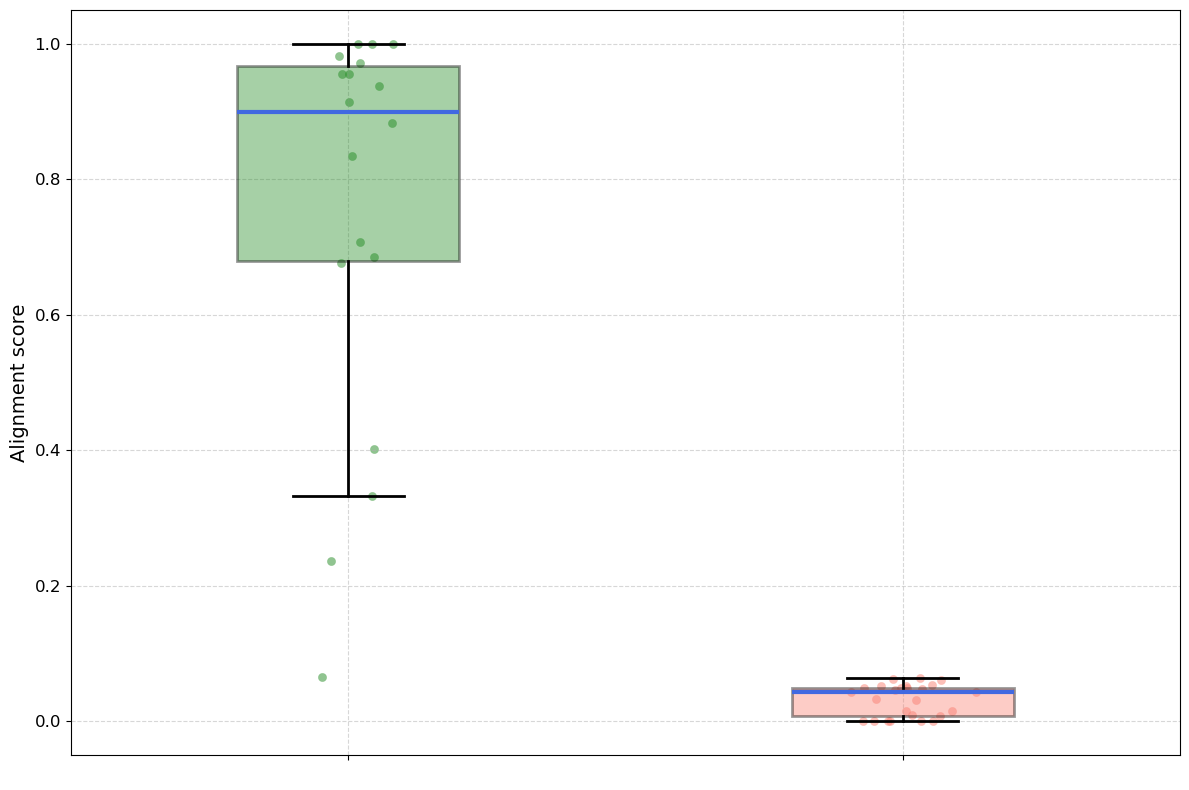

In [78]:
data = [df.iloc[:, 2].dropna().values for df in [df_putative_intragenic_o_preEnsFilter, df_putative_intragenic_p_preEnsFilter]]
positions = [0, 1]
colors = ['forestgreen', 'salmon']

plt.figure(figsize=(12, 8))

box = plt.boxplot(data, 
                  positions=positions, 
                  widths=0.4,
				  #notch=True,
                  patch_artist=True, 
                  showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
    patch.set_alpha(0.4)
    
for element in ['whiskers', 'caps']:
    for line in box[element]:
        line.set_linewidth(2)
        line.set_color('black')
        
for element in ['medians']:
    for line in box[element]:
        line.set_linewidth(3)
        line.set_color('royalblue')

for i, (scores, color) in enumerate(zip(data, colors)):
    jittered_x = np.random.normal(loc=positions[i], scale=0.05, size=len(scores))
    plt.scatter(jittered_x, scores, alpha=0.5, color=color, linewidth=0.2, label=['WGD', 'SSD'][i])

plt.ylabel('Alignment score', fontsize=14)
plt.xticks(positions, [' ', ' '], fontsize=100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig(f'{pic_path}{network}_putative_intragenic_target_similarity_boxplot.png', dpi=300)	
plt.show()

## MirGeneDB WGD vs. Ensembl SSD

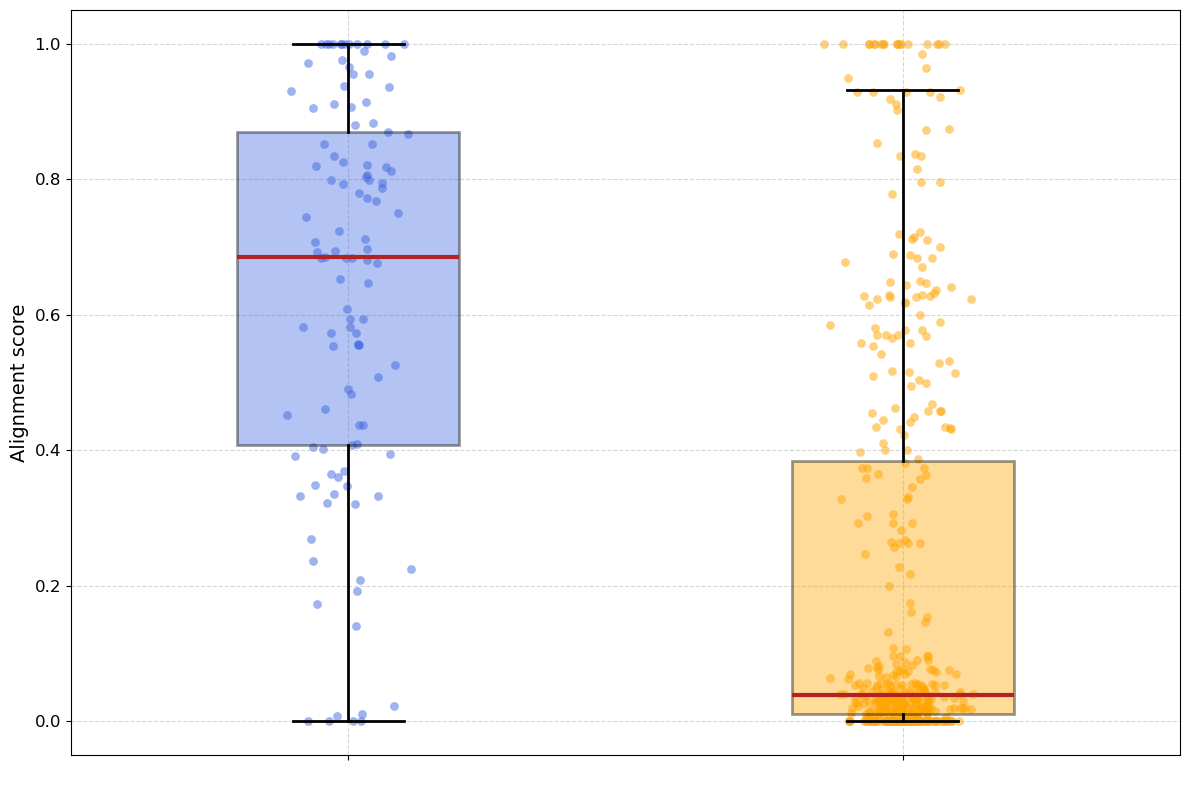

In [79]:
data = [df.iloc[:, 2].dropna().values for df in [df_mirgenedb_o, df_ensembl_p]]
positions = [0, 1]
colors = ['royalblue', 'orange']

plt.figure(figsize=(12, 8))

box = plt.boxplot(data, 
                  positions=positions, 
                  widths=0.4,
				  #notch=True,
                  patch_artist=True, 
                  showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
    patch.set_alpha(0.4)
    
for element in ['whiskers', 'caps']:
    for line in box[element]:
        line.set_linewidth(2)
        line.set_color('black')
        
for element in ['medians']:
    for line in box[element]:
        line.set_linewidth(3)
        line.set_color('firebrick')

for i, (scores, color) in enumerate(zip(data, colors)):
    jittered_x = np.random.normal(loc=positions[i], scale=0.05, size=len(scores))
    plt.scatter(jittered_x, scores, alpha=0.5, color=color, linewidth=0.2, label=['WGD', 'SSD'][i])

plt.ylabel('Alignment score', fontsize=14)
plt.xticks(positions, [' ', ' '], fontsize=100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig(f'{pic_path}{network}_true_duplicates_EnsemblSSD_target_similarity_boxplot.png', dpi=300)
plt.show()

## MirGeneDB WGD vs. MirGeneDB SSD

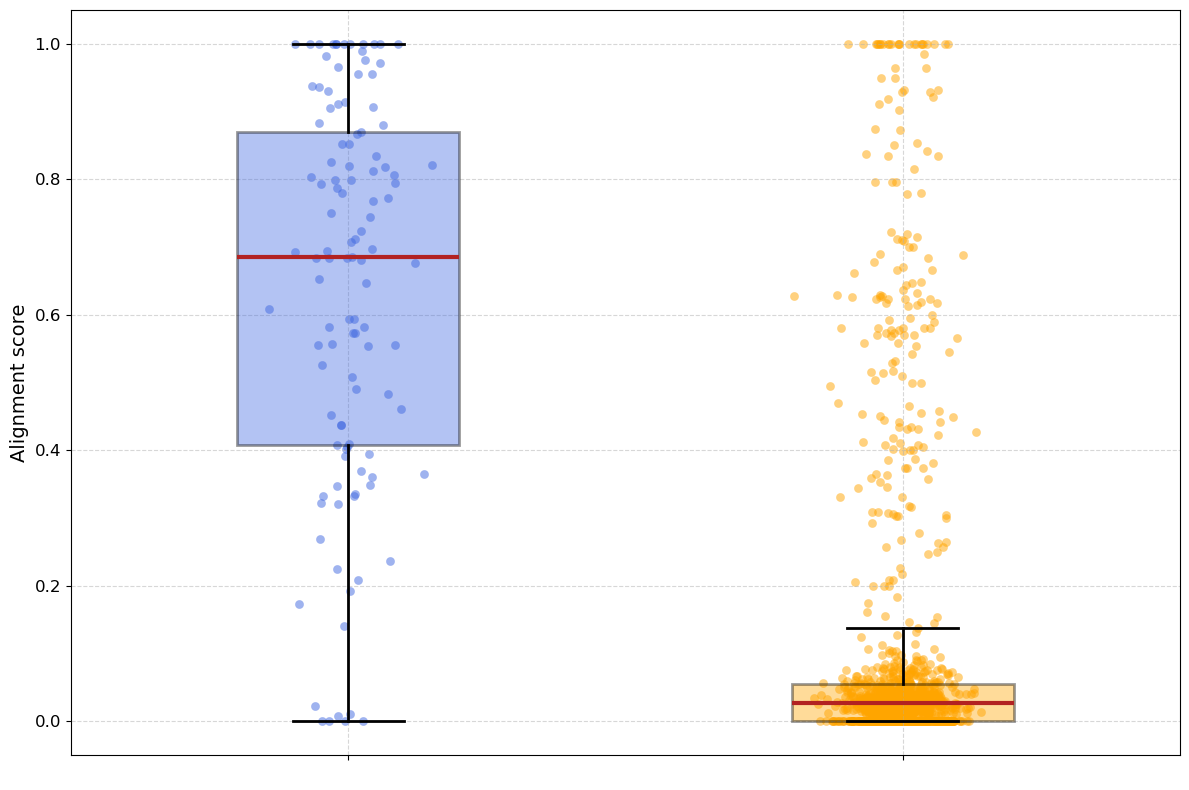

In [80]:
data = [df.iloc[:, 2].dropna().values for df in [df_mirgenedb_o, df_mirgenedb_p]]
positions = [0, 1]
colors = ['royalblue', 'orange']

plt.figure(figsize=(12, 8))

box = plt.boxplot(data, 
                  positions=positions, 
                  widths=0.4,
				  #notch=True,
                  patch_artist=True, 
                  showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
    patch.set_alpha(0.4)
    
for element in ['whiskers', 'caps']:
    for line in box[element]:
        line.set_linewidth(2)
        line.set_color('black')
        
for element in ['medians']:
    for line in box[element]:
        line.set_linewidth(3)
        line.set_color('firebrick')

for i, (scores, color) in enumerate(zip(data, colors)):
    jittered_x = np.random.normal(loc=positions[i], scale=0.05, size=len(scores))
    plt.scatter(jittered_x, scores, alpha=0.5, color=color, linewidth=0.2, label=['WGD', 'SSD'][i])

plt.ylabel('Alignment score', fontsize=14)
plt.xticks(positions, [' ', ' '], fontsize=100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig(f'{pic_path}{network}_true_duplicates_mirgenedbSSD_target_similarity_boxplot.png', dpi=300)
plt.show()

## Number of pairs - recap

In [81]:
print("Number of putative intragenic ohno miRNAs:", len(df_putative_intragenic_o))
print("Number of putative intragenic paralog miRNAs:", len(df_putative_intragenic_p))
print("Number of putative intragenic ohno miRNAs (pre-Ensembl filter):", len(df_putative_intragenic_o_preEnsFilter))
print("Number of putative intragenic paralog miRNAs (pre-Ensembl filter):", len(df_putative_intragenic_p_preEnsFilter))

Number of putative intragenic ohno miRNAs: 17
Number of putative intragenic paralog miRNAs: 1
Number of putative intragenic ohno miRNAs (pre-Ensembl filter): 18
Number of putative intragenic paralog miRNAs (pre-Ensembl filter): 25


In [82]:
print("Number of MirGeneDB ohnomiRNAs:", len(df_mirgenedb_o))
print("Number of MirGeneDB paralogmiRNAs:", len(df_mirgenedb_p))
print("Number of Ensembl paralogmiRNAs:", len(df_ensembl_p))

Number of MirGeneDB ohnomiRNAs: 113
Number of MirGeneDB paralogmiRNAs: 1271
Number of Ensembl paralogmiRNAs: 455
